# Part #1

Data Science/Decision Science - O-Notation - Graph-Based Algorithms, LASSO, Ridge,... 


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression
import operator
from sklearn.preprocessing import PolynomialFeatures

with open('./vgsales.csv', mode='r') as file:
    df = pd.read_csv(file)

df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [2]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [3]:
df = df.dropna()

##  Data Science vs Decision Science

There is often confusion between Data Science and Decision Science. However there is a major difference between these two terms:

**Data Science**
>"*Interdisciplinary field that uses scientific algorithms, methods, techniques and various approaches to extract valuable insight from structured and unstructured data.*"
>
>Data is the tool for business improvement and development.</center>
 
 
**Decision Science**

>"*An application of a complex of quantitative techniques to facilitate the decision-making process.*"
>
>Data is a tool to make decisions.


A data scientist is often dedicated to one specific product or feature and spends a lot of time gathering accurate data, running statistical analysis and improving it. He has deep knowledge of their product and less of the ecosystem.

A decision scientist normally supports the decision takers in a company, for example how much budget the marketing department should spend on tv advertisement. He is helping to make decisions about budgets and priorities and therefore prepares graphs and tables to support it. Basis is often the outcome of Data Science colleagues.

**Looking at the videogames sales dataset** a decision science use case could for example be to analyse if the sales was increasing or falling the year before and therefore the decision can be taken if a new videogame should be developed or not. A data science approach would rather analyse what were the influences of increasing or falling sales numbers (altough analysing a sales dataset is primarily useful to make a decision anyways.)

*Sources:*

https://www.kdnuggets.com/2019/05/data-science-vs-decision-science.html

https://towardsdatascience.com/data-science-vs-decision-science-8f8d53ce25da


## O-Notation

>"*In programming, an algorithm is a process or set of rules to be followed in order to achieve a particular goal. An algorithm is >characterized by its running time (run-time), whether in terms of space or time. As data scientists, we are interested in the >most efficient algorithm so that we can optimize our workflow.*"

The picture below shows how the kind of operations in an algorithm influences the runtime.

<img src="img/img-bigO.png" alt="img-bigO" width="400"/>

For the videogames dataset, the O Notation can for example play a role in a regression model made for the sales data.

## Generalized Linear Models

A linear relationship is a common way to describe the relationship between input variables $X_1, X_2, ..., X_n$ and an output variable $Y$ and is written as in the following formula, fitted using least squares:

$$ Y = \beta_0 + \beta_1 X_1 + ... + \beta_n X_n + \epsilon $$

Especially in real-world problems, a linear approach is often surprisingly competitive in comparison to a non-linear model.
That is why, before moving to a non-linear world, we want to take into account some approaches for extending the linear model framework. In these extensions, the plain least squares fitting is replaced with some alternative fitting procedures.

In [4]:
from collections import Counter 
test_list = Counter(df.Publisher) 
res = test_list.most_common(10)
res
#df.groupby('Publisher').count()

[('Electronic Arts', 1339),
 ('Activision', 966),
 ('Namco Bandai Games', 928),
 ('Ubisoft', 918),
 ('Konami Digital Entertainment', 823),
 ('THQ', 712),
 ('Nintendo', 696),
 ('Sony Computer Entertainment', 682),
 ('Sega', 632),
 ('Take-Two Interactive', 412)]

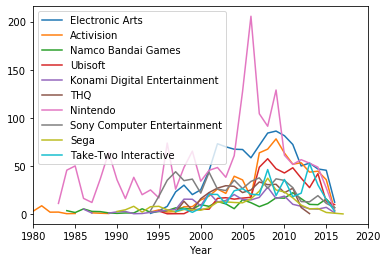

In [5]:
data = pd.DataFrame([
    df[df.Publisher == 'Electronic Arts'].groupby('Year').sum().Global_Sales,
    df[df.Publisher == 'Activision'].groupby('Year').sum().Global_Sales,
    df[df.Publisher == 'Namco Bandai Games'].groupby('Year').sum().Global_Sales,
    df[df.Publisher == 'Ubisoft'].groupby('Year').sum().Global_Sales,
    df[df.Publisher == 'Konami Digital Entertainment'].groupby('Year').sum().Global_Sales,
    df[df.Publisher == 'THQ'].groupby('Year').sum().Global_Sales,
    df[df.Publisher == 'Nintendo'].groupby('Year').sum().Global_Sales,
    df[df.Publisher == 'Sony Computer Entertainment'].groupby('Year').sum().Global_Sales,
    df[df.Publisher == 'Sega'].groupby('Year').sum().Global_Sales,
    df[df.Publisher == 'Take-Two Interactive'].groupby('Year').sum().Global_Sales]).T


data.columns = ['Electronic Arts', 'Activision','Namco Bandai Games','Ubisoft',
               'Konami Digital Entertainment','THQ','Nintendo','Sony Computer Entertainment', 'Sega', 'Take-Two Interactive']

data.plot()

In [6]:
data.head()

,Electronic Arts,Activision,Namco Bandai Games,Ubisoft,Konami Digital Entertainment,THQ,Nintendo,Sony Computer Entertainment,Sega,Take-Two Interactive
Year,,,,,,,,,,
1980.0,NaN,3.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981.0,NaN,8.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982.0,NaN,1.86,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN
1983.0,NaN,1.94,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN
1984.0,NaN,0.27,3.43,NaN,NaN,NaN,45.56,NaN,NaN,NaN


In [7]:
y = data['Electronic Arts']
y.head()

Year
1980.0   NaN
1981.0   NaN
1982.0   NaN
1983.0   NaN
1984.0   NaN
Name: Electronic Arts, dtype: float64

In [8]:
x = data['Activision']
x.head()

Year
1980.0    3.02
1981.0    8.50
1982.0    1.86
1983.0    1.94
1984.0    0.27
Name: Activision, dtype: float64

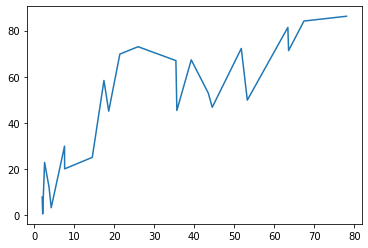

In [9]:
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y']).dropna()
data = data.sort_values(by=['x'])
plt.plot(data.x, data.y)

In [10]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print(data.head())

       x      y      x_2        x_3         x_4          x_5          x_6  \
16  1.95   7.90   3.8025   7.414875   14.459006    28.195062    54.980371   
14  2.08   0.65   4.3264   8.998912   18.717737    38.932893    80.980417   
17  2.55  22.94   6.5025  16.581375   42.282506   107.820391   274.941997   
36  3.67  12.25  13.4689  49.430863  181.411267   665.779351  2443.410217   
15  4.21   3.33  17.7241  74.618461  314.143721  1322.545065  5567.914722   

             x_7           x_8            x_9          x_10          x_11  \
16    107.211724    209.062862     407.672580  7.949615e+02  1.550175e+03   
14    168.439268    350.353677     728.735648  1.515770e+03  3.152802e+03   
17    701.102092   1787.810335    4558.916354  1.162524e+04  2.964435e+04   
36   8967.315496  32910.047871  120779.875686  4.432621e+05  1.626772e+06   
15  23440.920980  98686.277324  415469.227536  1.749125e+06  7.363818e+06   

            x_12          x_13          x_14          x_15  
16  3.022841e

In [11]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

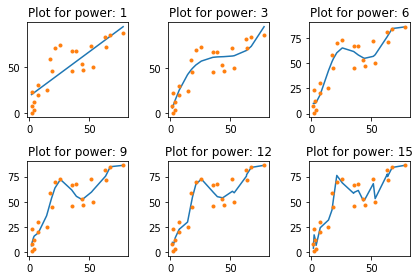

In [12]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [13]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,4.7e+03,18,0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.9e+03,10,1.9,-0.013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,2.6e+03,-2,4.4,-0.099,0.00076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,2.5e+03,-7.7,6.2,-0.21,0.003,-1.4e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1.9e+03,9.2,-0.88,0.44,-0.019,0.0003,-1.6e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,1.9e+03,14,-3.1,0.72,-0.034,0.00066,-5.7e-06,1.8e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,1.8e+03,2.9,3.5,-0.46,0.055,-0.0026,5.7e-05,-5.9e-07,2.3e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,1.6e+03,-18,18,-3.6,0.35,-0.017,0.00044,-6.5e-06,5e-08,-1.6e-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,1.6e+03,-17,18,-3.5,0.34,-0.016,0.00042,-6.1e-06,4.4e-08,-1.2e-10,-1.1e-13,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,1.5e+03,17,-12,5.5,-0.94,0.085,-0.0044,0.00014,-2.6e-06,3e-08,-1.9e-10,5e-13,NaN,NaN,NaN,NaN,NaN


### Ridge Regression

In [14]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

c:\program files\python\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.42678e-17): result may not be accurate.
  overwrite_a=True).T


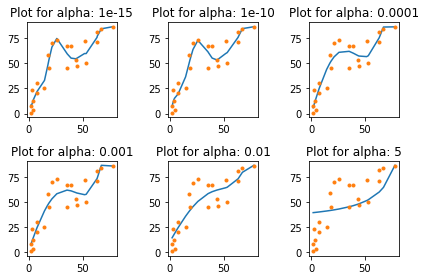

In [15]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [16]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,1.5e+03,29,-25,10,-1.8,0.16,-0.0087,0.00027,-4.3e-06,1.6e-08,4.8e-10,-3.3e-12,-8.2e-14,7.7e-16,1.1e-17,-1.9e-19,7.5e-22
alpha_1e-10,1.6e+03,-9.7,12,-2,0.17,-0.0056,5.9e-05,5.8e-07,-7.5e-09,-1.3e-10,-5e-14,1.8e-14,2.2e-16,9.5e-20,-3.7e-20,-4.7e-22,5.9e-24
alpha_1e-08,1.7e+03,7,1,0.019,0.012,-0.00056,4.1e-06,8.1e-08,6.4e-12,-1e-11,-1.3e-13,-4.6e-16,9.6e-18,2.2e-19,2.2e-21,2.2e-24,-4.4e-25
alpha_0.0001,2.1e+03,-1.5,3.8,-0.039,-0.00073,1.7e-07,9.2e-08,1.3e-09,1e-11,2.5e-14,-8.1e-16,-1.8e-17,-2.5e-19,-2.5e-21,-1.4e-23,1.1e-25,5.6e-27
alpha_0.001,2.2e+03,1.7,3.3,-0.034,-0.00038,-6.9e-07,3e-08,5.7e-10,6.8e-12,6.3e-14,4.3e-16,1.2e-18,-2.9e-20,-7.9e-22,-1.4e-23,-2e-25,-2.7e-27
alpha_0.01,3.1e+03,11,1.9,-0.01,-0.00016,-8.8e-07,3.6e-09,1.6e-10,2.6e-12,3.2e-14,3.2e-16,2.5e-18,1.1e-20,-1.4e-22,-5.1e-24,-1e-25,-1.8e-27
alpha_1,7e+03,32,0.3,0.0023,2e-05,1.8e-07,1.6e-09,1.5e-11,1.3e-13,9.8e-16,5.3e-18,-1.1e-20,-1e-21,-2.2e-23,-3.8e-25,-6e-27,-8.8e-29
alpha_5,9.9e+03,39,0.11,0.0011,1.2e-05,1.3e-07,1.4e-09,1.5e-11,1.7e-13,1.8e-15,2e-17,2.1e-19,2.3e-21,2.4e-23,2.6e-25,2.8e-27,2.9e-29
alpha_10,1.1e+04,42,0.065,0.00069,7.9e-06,9.1e-08,1.1e-09,1.2e-11,1.4e-13,1.6e-15,1.9e-17,2.2e-19,2.5e-21,2.9e-23,3.5e-25,4.1e-27,4.9e-29
alpha_20,1.3e+04,44,0.038,0.00042,5e-06,6e-08,7.2e-10,8.6e-12,1e-13,1.2e-15,1.5e-17,1.7e-19,2.1e-21,2.5e-23,3e-25,3.7e-27,4.5e-29


In [17]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64

### Lasso Regression

In [18]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

c:\program files\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 946.8496672471271, tolerance: 1.6371142947826094
  positive)
c:\program files\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 946.8492903223394, tolerance: 1.6371142947826094
  positive)
c:\program files\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 946.8119744963312, tolerance: 1.6371142947826094
  positive)
c:\program files\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

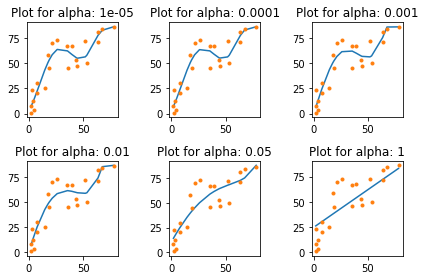

In [19]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3, 1e-2, 5e-2, 1, 5]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-5:231,1e-4:232, 1e-3:233, 1e-2:234, 5e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [20]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,1.9e+03,3.3,1.7,0.15,-0.0059,2.8e-05,5.2e-07,2.4e-09,-1.4e-11,-3.9e-13,-4.6e-15,-3.8e-17,-2e-19,4.2e-22,3e-23,5.5e-25,7.7e-27
alpha_1e-10,1.9e+03,3.3,1.7,0.15,-0.0059,2.8e-05,5.2e-07,2.4e-09,-1.4e-11,-3.9e-13,-4.6e-15,-3.8e-17,-2e-19,4.2e-22,3e-23,5.5e-25,7.7e-27
alpha_1e-08,1.9e+03,3.3,1.7,0.15,-0.0059,2.8e-05,5.2e-07,2.4e-09,-1.4e-11,-3.9e-13,-4.6e-15,-3.8e-17,-2e-19,4.2e-22,3e-23,5.5e-25,7.7e-27
alpha_1e-05,1.9e+03,3.3,1.8,0.15,-0.0059,2.7e-05,5.2e-07,2.4e-09,-1.2e-11,-3.9e-13,-4.6e-15,-3.8e-17,-1.9e-19,2.7e-22,2.5e-23,5.7e-25,8.1e-27
alpha_0.0001,1.9e+03,2.7,2,0.12,-0.0052,2e-05,5.1e-07,2e-09,-0,-3.8e-13,-4.9e-15,-3.7e-17,-1.3e-19,-0,0,4.1e-25,1.2e-26
alpha_0.001,2e+03,-0.49,3.4,-0,-0.0017,0,3.4e-07,0,0,-0,-3.7e-16,-4.6e-17,-0,-0,-0,0,3e-27
alpha_0.01,2.2e+03,-0.096,3.8,-0.06,-0,0,0,1.3e-09,0,0,0,-0,-0,-0,-0,-0,-5.1e-27
alpha_0.05,3.5e+03,10,2,-0.018,-0,0,0,3e-11,1.3e-12,0,0,0,0,-0,-0,-0,-0
alpha_1,5.3e+03,25,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0
alpha_5,1.6e+04,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      0
alpha_0.0001     3
alpha_0.001      9
alpha_0.01      11
alpha_0.05      11
alpha_1         14
alpha_5         15
dtype: int64

### Elastic Net

***Sources:*** 

*https://towardsdatascience.com/a-data-scientists-guide-to-data-structures-algorithms-1176395015a0*

*https://dev.to/b0nbon1/understanding-big-o-notation-with-javascript-25mc*


*ISL - Chapter 6: Linear Model Selection and Regularization*

*https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/*